# __Simple Linear Regression in Python__

By: Trevor Rowland ([dBCooper2](https://github.com/dBCooper2))

Creating a Linear Regression Model from scratch

This is an old notebook from the Portfolio Backtesting repository. I figured it would fit better here versus a project repository as this is a series of notebooks instead of a final product.

___ADD AN IMAGE HERE___

### _References_

NeuralNine. "Linear Regression from Scratch in Python." NeuralNine, NeuralNine, <https://www.neuralnine.com/linear-regression-from-scratch-in-python/>

### _Table of Contents_

#### [The Theory](#the-theory)
  - [Mean Squared Error](#mean-squared-error)

  - [Partial Derivatives of the Error Function](#partial-derivatives-of-the-error-function)

  - [The Gradient Descent](#the-gradient-descent)

#### [Applying the Theory to Python](#applying-the-theory-to-python)
  
  - [Gradient Descent Function](#gradient-descent-function)
  
  - [Performing Linear Regression](#performing-linear-regression)
  
  - [Testing the Linear Regression Model](#testing-the-linear-regression-model)
  
  - [Plotting the Regression Line](#plotting-the-regression-line)

#### [Evaluating the Regression Results](#evaluating-the-regression-results)
  - [Variance](#variance)
  
  - [Bias](#bias)
  
  - [Confidence Intervals](#confidence-intervals)
  
  - [P-Values](#p-values)
  
  - [R-Squared](#r-squared)
  
  - [Adjusted R-Squared](#adjusted-r-squared)

## The Theory

Regression Analysis is a tool used in statistics and finance to see how strongly related an dependent variable and one or more independent variables are. 

This regression model uses an Ordinary Least Squares(OLS) approach to regression. The OLS model plots a line on a scatter plot, measures how far away it is from each point, then iteratively adjusts the slope and y-intercept in the linear equation to provide the line of best fit for the data.

_How does this happen?_

The Regression Model plots a line through all of the points in our dataset. 

When the line is plotted, the points on the line will be different from the points in the dataset. The difference between the actual point and the point estimated by the line ($Y_i-\hat{Y_i}$) can be called an error. 

The sum of those errors can be calculated to find the total error in the regression line. 

Squaring those errors and dividing that sum of all squared errors by the number of y-values gives us a measure called the __Mean Squared Error__, or MSE:

$$MSE=\frac{1}{n} \sum_{i=0}^{n}(Y_i - \hat{Y}_i)^2$$

given

$$ \hat{Y}_i = mx_i+b$$

### Mean Squared Error

__The Mean Squared Error describes what the average error is__, and to make the best-fit regression line, __that error must be minimized__. 

Because the data cannot be modified, to develop the best-fit regression line the slope ($m$) and the y-intercept($b$) must be modified. This involves iterating over many different calculated values of $m$ and $b$, so how will the program know how to adjust the values across iterations?

The program will adjust the values by calculating the gradient descent of the Error($E$) with respect to $m$ and with respect to $b$. This can be done using partial derivatives of the Error function to find the fastest way to increase the Error because derivatives measure a rate of change. Here are the calculations to find those gradient descent functions:

$$ MSE = E(\hat{Y}_i) = (\frac{1}{n}) \sum_{i=0}^{n}(Y_i - \hat{Y}_i)^2$$

which decomposes into:

$$ MSE = E(m,b) = (\frac{1}{n}) \sum_{i=0}^{n}(Y_i - (mx_i+b))^2$$

and for easier calculations, can be fully expanded into:

$$ E(m,b) = (\frac{1}{n}) \sum_{i=0}^{n}(Y_i^2 -2Y_imx_i-2Y_ib+m^2x_i^2+2mx_ib+b^2)$$

### Partial Derivatives of the Error Function

Taking the Partial Derivative of E(m,b) with respect to m:

$$(\frac{\partial}{\partial m})E(m,b) = (\frac{\partial}{\partial m})(\frac{1}{n}) \sum_{i=0}^{n}(Y_i^2 -2Y_imx_i-2Y_ib+m^2x_i^2+2mx_ib+b^2)$$

$$\frac{\partial E}{\partial m} = (\frac{1}{n}) \sum_{i=0}^{n}( -2Y_ix_i+2mx_i^2+2x_ib)$$

$$\frac{\partial E}{\partial m} = (\frac{-2}{n}) \sum_{i=0}^{n}(Y_ix_i-mx_i^2-x_ib)$$

$$\frac{\partial E}{\partial m} = (\frac{-2}{n}) \sum_{i=0}^{n}x_i(Y_i-mx_i-b)$$

$$\frac{\partial E}{\partial m} = (\frac{-2}{n}) \sum_{i=0}^{n}[x_i(Y_i-(mx_i+b))]$$

Taking the Partial Derivative of E(m,b) with respect to b:

$$(\frac{\partial}{\partial b})E(m,b) = (\frac{\partial}{\partial b})(\frac{1}{n}) \sum_{i=0}^{n}(Y_i^2 -2Y_imx_i-2Y_ib+m^2x_i^2+2mx_ib+b^2)$$

$$\frac{\partial E}{\partial b} = (\frac{1}{n}) \sum_{i=0}^{n}(-2Y_i+2mx_i+2b)$$

$$\frac{\partial E}{\partial b} = (\frac{-2}{n}) \sum_{i=0}^{n}(Y_i-mx_i-b)$$

$$\frac{\partial E}{\partial b} = (\frac{-2}{n}) \sum_{i=0}^{n}(Y_i-(mx_i+b))$$

After these calculations, the partial derivatives of the error function are as follows:

$$\frac{\partial E}{\partial m} = (\frac{-2}{n}) \sum_{i=0}^{n}[x_i(Y_i-(mx_i+b))]$$

$$\frac{\partial E}{\partial b} = (\frac{-2}{n}) \sum_{i=0}^{n}(Y_i-(mx_i+b))$$

### The Gradient Descent

The gradient descent function is calculated by subtracting the partial derivative from the current value of $m$ or $b$, respectively, so our equations for the learning rate look like this:

$$m_{new} = m_{current} - \frac{\partial E}{\partial m}$$

$$b_{new} = m_{current} - \frac{\partial E}{\partial b}$$

The program _subtracts_ the partial derivative because the regression analysis should use the gradient descent, and the current partial derivative calculates the gradient ascent.

This would be great if the program was going to run all at once, but because the regression function will be calculated iteratively, the partial derivatives need to be multiplied by a constant to set the step size for each iteration. This is known as the __Learning Rate__, and will be denoted by $L$, making the gradient descent functions: 

$$m_{new} = m_{current} - L\frac{\partial E}{\partial m}$$

$$b_{new} = m_{current} - L\frac{\partial E}{\partial b}$$

where $0 < L <1$

The learning rate value will be set later, but the important thing to note now is that the smaller the learning rate or step size, the more the model will try to fit the line to the data. For example, $L=.1$ is going to be less precise than $L=.001$, which is less precise than $L=.00001$, and so on.

## Applying the Theory to Python

To apply the calculations of the partial derivatives of the Error function in Python, the gradient descent function must be defined in Python, and then the program will iterate over calls to that function.

### Gradient Descent Function

In [1]:
def gradient_descent(m_current, b_current, df, learning_rate):
    m_gradient = 0
    b_gradient = 0

    n = len(df) # The number of rows in the dataset

    # Calculate the partial derivative summations
    for i in range(n):
        x = df.iloc[i].x
        y = df.iloc[i].y

        # These are a pythonic representation of partial derivative equations found in the theory section
        m_gradient += (-2/n) * x * (y - (m_current * x + b_current))
        b_gradient += (-2/n) * (y - (m_current * x + b_current))

    # Calculate the Gradient Descent equations from the theory section
    m = m_current - learning_rate * m_gradient
    b = b_current - learning_rate * b_gradient

    return m,b

### Performing Linear Regression

Now that the gradient descent function is complete, a function to iteratively call that function is needed to minimize the error of the regression line

In [2]:
def ols_regression(learning_rate, iterations, df):
    m = 0
    b = 0

    for i in range(iterations):
        m,b = gradient_descent(m, b, df, learning_rate)

    return m,b

### Testing the Linear Regression Model

To apply the OLS linear regression functions, the program will take a dataset and perform the regression on it. The [dataset](https://www.kaggle.com/datasets/luddarell/101-simple-linear-regressioncsv?resource=download) being used is just a simple CSV file by [luddarell](https://www.kaggle.com/luddarell) from [kaggle](https://www.kaggle.com/).

In [3]:
import pandas as pd

# Import the Data
file = '/Users/dB/Documents/repos/github/portfolio-backtesting/docs/data/1.01_Simple_linear_regression.csv'

df = pd.read_csv(file)
df2 = pd.DataFrame()

df2['y'] = df['SAT']
df2['x'] = df['GPA']

df = df2

In [4]:
# Run the Regression Model:
learning_rate = .001
iterations = 10000
m,b = ols_regression(learning_rate, iterations, df)
print(m,b)

477.47759913775326 250.49383109375495


### Plotting the Regression Line

To plot the regression line and observe the variance, use seaborn's regplot() function.

<Axes: xlabel='x', ylabel='y'>

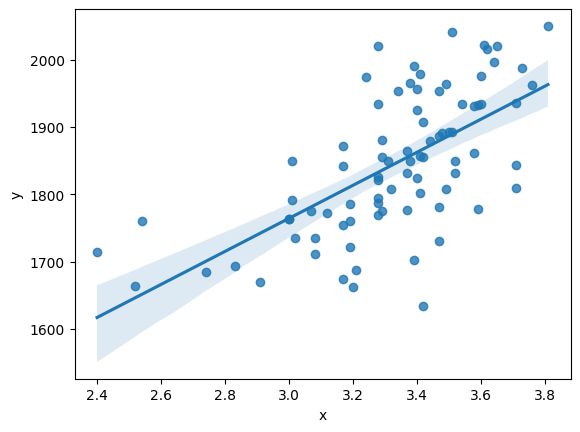

In [5]:
import seaborn as sns

sns.regplot(x ='x', y='y',data=df)

### Where to Find These Functions:

There is a class in scripts/ named simple_linear_ols_regression.py containing a class labeled _SL\_OLS\_Regression_ with the gradient descent and regression function.

Here is the link to the file: https://github.com/dBCooper2/portfolio-backtesting/blob/main/scripts/simple_linear_ols_regression.py


